# Import Library

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
df = pd.read_csv('indonesian_movies.csv')
df

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min
...,...,...,...,...,...,...,...,...,...,...,...
1267,The Tiger from Tjampa,1953,"Set in the 1930s, and narrated like a ballad f...",Drama,NaN,6.4,30,Indonesian,D. Djajakusuma,"['Wahid Chan', 'Bambang Hermanto', 'R.D. Ismai...",97 min
1268,Enam Djam di Djogja,1951,Depicting the celebrated recapture of the town...,Drama,NaN,6.3,9,Indonesian,Usmar Ismail,"['R.D. Ismail', 'Del Juzar', 'Aedy Moward', 'A...",116 min
1269,Darah dan Doa,1950,It tells the story of an Indonesian revolution...,Drama,NaN,6.6,27,Indonesian,Usmar Ismail,"['Ella Bergen', 'Faridah', 'R.D. Ismail', 'Del...",150 min
1270,Resia Boroboedoer,1928,NaN,Adventure,NaN,7.0,8,Indonesian,NaN,"['Olive Young', nan, nan, nan, nan, nan, nan, ...",NaN


# Data Preparation

In [33]:
# cek tipe data dari setiap kolom
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1272 entries, 0 to 1271
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         1272 non-null   object 
 1   year          1272 non-null   int64  
 2   description   840 non-null    object 
 3   genre         1236 non-null   object 
 4   rating        376 non-null    object 
 5   users_rating  1272 non-null   float64
 6   votes         1272 non-null   object 
 7   languages     1272 non-null   object 
 8   directors     1265 non-null   object 
 9   actors        1272 non-null   object 
 10  runtime       869 non-null    object 
dtypes: float64(1), int64(1), object(9)
memory usage: 109.4+ KB
None


##### Kolom yang akan digunakan yaitu : year , genre , user_rating

In [34]:
# Cek missing value dan zeros
print(df.isnull().sum().sort_values(ascending=False))

rating          896
description     432
runtime         403
genre            36
directors         7
title             0
year              0
users_rating      0
votes             0
languages         0
actors            0
dtype: int64


In [35]:
df = df.copy(deep=True)

In [36]:
df = df.dropna(axis='rows')
df.head()

,title,year,description,genre,rating,users_rating,votes,languages,directors,actors,runtime
0,#FriendButMarried 2,2020,Ayudia (Mawar De Jongh) is not satisfied enoug...,Biography,13+,6.5,120,Indonesian,Rako Prijanto,"['Adipati Dolken', 'Mawar Eva de Jongh', 'Vonn...",100 min
1,4 Mantan,2020,"Sara, Airin, Rachel, and Amara were accidental...",Thriller,17+,6.4,8,Indonesian,Hanny Saputra,"['Ranty Maria', 'Jeff Smith', 'Melanie Berentz...",80 min
2,Aku Tahu Kapan Kamu Mati,2020,"After apparent death, Siena is able to see sig...",Horror,13+,5.4,17,Indonesian,Hadrah Daeng Ratu,"['Natasha Wilona', 'Ria Ricis', 'Al Ghazali', ...",92 min
3,Anak Garuda,2020,"Good Morning Indonesia, a school for poor orph...",Adventure,13+,9.1,27,Indonesian,Faozan Rizal,"['Tissa Biani Azzahra', 'Violla Georgie', 'Aji...",129 min
4,Dignitate,2020,Alfi (Al Ghazali) meets Alana (Caitlin Halderm...,Drama,17+,7.6,33,Indonesian,Fajar Nugros,"['Al Ghazali', 'Caitlin Halderman', 'Giorgino ...",109 min


In [37]:
print(df.isnull().sum().sort_values(ascending=False))

title           0
year            0
description     0
genre           0
rating          0
users_rating    0
votes           0
languages       0
directors       0
actors          0
runtime         0
dtype: int64


dalam hal ini row yang terdapat missing value sudah tidak ada

# Dalam informasi dataset di atas bahwa genre bertype object dan user_rating bertype float
Metode apriori dalam market basket analysis nantinya akan error, maka kita akan ubah dengan type string dan type integer

In [38]:
df['users_rating'] = df['users_rating'].astype(int)

In [39]:
df['genre'] = df['genre'].astype(str)

In [42]:
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 1222
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         286 non-null    object
 1   year          286 non-null    int64 
 2   description   286 non-null    object
 3   genre         286 non-null    object
 4   rating        286 non-null    object
 5   users_rating  286 non-null    int32 
 6   votes         286 non-null    object
 7   languages     286 non-null    object
 8   directors     286 non-null    object
 9   actors        286 non-null    object
 10  runtime       286 non-null    object
dtypes: int32(1), int64(1), object(9)
memory usage: 25.7+ KB
None


## Jika semua sudah aman kita akan drop column yang tidak diperlukan

In [43]:
columns = ['title','description','rating','votes','languages','directors','actors','runtime']
df.drop(columns, inplace=True, axis=1)

In [44]:
print('Dataset Information: \n')
print(df.info())

Dataset Information: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 286 entries, 0 to 1222
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   year          286 non-null    int64 
 1   genre         286 non-null    object
 2   users_rating  286 non-null    int32 
dtypes: int32(1), int64(1), object(1)
memory usage: 7.8+ KB
None


# Visualisasi dan Memahami data

In [45]:
most_rate = df['genre'].value_counts().head(20)

print('Biggest Rate Genre film: \n')
print(most_rate)

Biggest Rate Genre film: 

Drama        96
Horror       68
Comedy       56
Action       33
Adventure    18
Biography     8
Crime         3
Thriller      1
Animation     1
History       1
Romance       1
Name: genre, dtype: int64


In [46]:
#presentase dari rating tiap genre
rating_count = df.groupby(by='genre')[['users_rating']].count().sort_values(by='users_rating', ascending=False)
def convert_to_percentage(x):
    return 100 * x / float(x.sum())

rating_percentage = rating_count.apply(convert_to_percentage)
rating_percentage.head()

,users_rating
genre,
Drama,33.566434
Horror,23.776224
Comedy,19.580420
Action,11.538462
Adventure,6.293706


Text(0.5, 1.0, 'Items Most Rate')

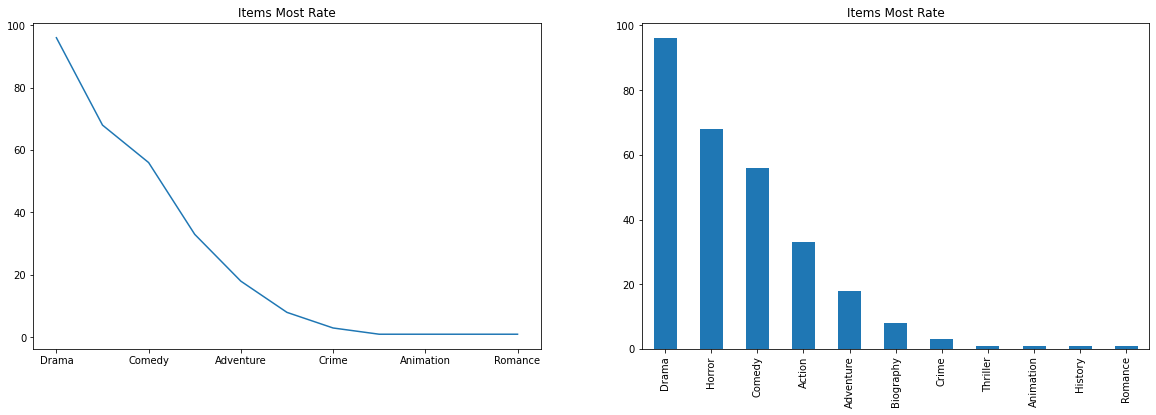

In [48]:
# visualisasikan data rating terbanyak ke line chart dan bar chart
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
#plt.plot(most_rate)
most_rate.plot(kind='line')
plt.title('Items Most Rate')

plt.subplot(1,2,2)
most_rate.plot(kind='bar')
plt.title('Items Most Rate')

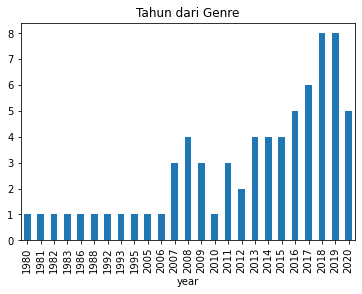

In [51]:
df.groupby('year')['users_rating'].nunique().plot(kind='bar', title='Tahun dari Genre')
plt.show()